## Pre-analysis download and set-up

In [3]:
# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.cm as cm
import matplotlib.colors as colors

# convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [36]:
# Toronto Census Data - Neighbourhood Profiles 2016 (CSV)
# https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


## Data Analysis Work

In [37]:
df.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

In [87]:
#Collecting neighbourhood names
Neighbourhoods = list(df.columns.values)
Neighbourhoods = Neighbourhoods[5:]

#Building a new data frame with the neighbourhoods, population, and income
dfToronto = pd.DataFrame(index=Neighbourhoods, columns=["Population_2016","Income_2016"])

#Populating the dataset
# Population_2016 = Population, 2016
# Income_2016 = Total income: Average amount ($)

for index, row in dfToronto.iterrows():
    dfToronto.at[index, 'Population_2016'] = df[index][2]
    dfToronto.at[index, 'Income_2016'] = df[index][2264]
    
dfToronto['Population_2016'] = dfToronto['Population_2016'].str.replace(',', '')
dfToronto['Income_2016'] = dfToronto['Income_2016'].str.replace(',', '')
    
dfToronto.sort_values('Income_2016')

,Population_2016,Income_2016
St.Andrew-Windfields,17812,100516
Edenbridge-Humber Valley,15535,101551
Lawrence Park North,14607,111730
Annex,30526,112766
Yonge-St.Clair,12528,114174
Bedford Park-Nortown,23236,123077
Leaside-Bennington,16828,125564
Kingsway South,9271,144642
Casa Loma,10968,165047
Lawrence Park South,15179,169203


In [88]:
dfToronto.dtypes

Population_2016    object
Income_2016        object
dtype: object

In [89]:
#change objects to int
dfToronto['Population_2016'] = dfToronto.Population_2016.astype(int)
dfToronto['Income_2016'] = dfToronto.Income_2016.astype(int)

dfToronto.dtypes

Population_2016    int64
Income_2016        int64
dtype: object

### Income Based Sorting

In [90]:
#Top 12 neighbourhoods by Income
dfTorontoIncome=dfToronto.sort_values(['Income_2016'], ascending=[False])
dfTorontoIncome.head(12)

,Population_2016,Income_2016
Bridle Path-Sunnybrook-York Mills,9266,308010
Rosedale-Moore Park,20923,207903
Forest Hill South,10732,204521
Lawrence Park South,15179,169203
Casa Loma,10968,165047
Kingsway South,9271,144642
Leaside-Bennington,16828,125564
Bedford Park-Nortown,23236,123077
Yonge-St.Clair,12528,114174
Annex,30526,112766


In [94]:
dfTorontoInc = dfTorontoIncome.loc[['Bridle Path-Sunnybrook-York Mills','Rosedale-Moore Park','Forest Hill South','Lawrence Park South','Casa Loma','Kingsway South','Leaside-Bennington','Bedford Park-Nortown','Yonge-St.Clair','Annex','Lawrence Park North','Edenbridge-Humber Valley']]
dfTorontoInc

,Population_2016,Income_2016
Bridle Path-Sunnybrook-York Mills,9266,308010
Rosedale-Moore Park,20923,207903
Forest Hill South,10732,204521
Lawrence Park South,15179,169203
Casa Loma,10968,165047
Kingsway South,9271,144642
Leaside-Bennington,16828,125564
Bedford Park-Nortown,23236,123077
Yonge-St.Clair,12528,114174
Annex,30526,112766


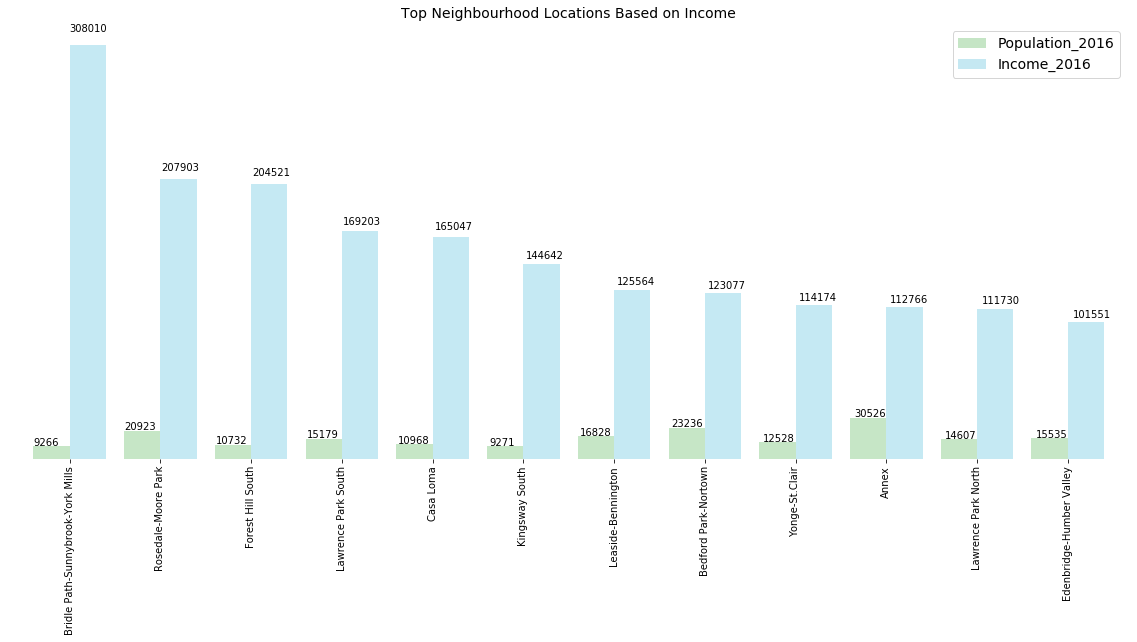

In [96]:
#Import visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

IncPlot = dfTorontoInc.plot(kind='bar', alpha=0.35, figsize=(20, 8),width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

IncPlot.set_title('Top Neighbourhood Locations Based on Income',fontsize=14)
IncPlot.set_ylabel('Number')
IncPlot.set_xlabel('Neighbourhoods')
IncPlot.legend(fontsize = 14)
IncPlot.set_frame_on(False)
IncPlot.set_xlabel(False).set_visible(False)
IncPlot.axes.get_yaxis().set_visible(False)
IncPlot.set_xticklabels(('Bridle Path-Sunnybrook-York Mills','Rosedale-Moore Park','Forest Hill South','Lawrence Park South','Casa Loma','Kingsway South','Leaside-Bennington','Bedford Park-Nortown','Yonge-St.Clair','Annex','Lawrence Park North','Edenbridge-Humber Valley'))

for p in IncPlot.patches:
    IncPlot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

In [103]:
dfTorontoIncVal = dfTorontoInc
dfTorontoIncVal['Total_Value_M'] = dfTorontoInc.Population_2016 * dfTorontoInc.Income_2016 / 1000000
dfTorontoIncVal

dfTorontoIncVal = dfTorontoIncVal.Total_Value_M
dfTorontoIncVal

Bridle Path-Sunnybrook-York Mills    2854.020660
Rosedale-Moore Park                  4349.954469
Forest Hill South                    2194.919372
Lawrence Park South                  2568.332337
Casa Loma                            1810.235496
Kingsway South                       1340.975982
Leaside-Bennington                   2112.990992
Bedford Park-Nortown                 2859.817172
Yonge-St.Clair                       1430.371872
Annex                                3442.294916
Lawrence Park North                  1632.040110
Edenbridge-Humber Valley             1577.594785
Name: Total_Value_M, dtype: float64

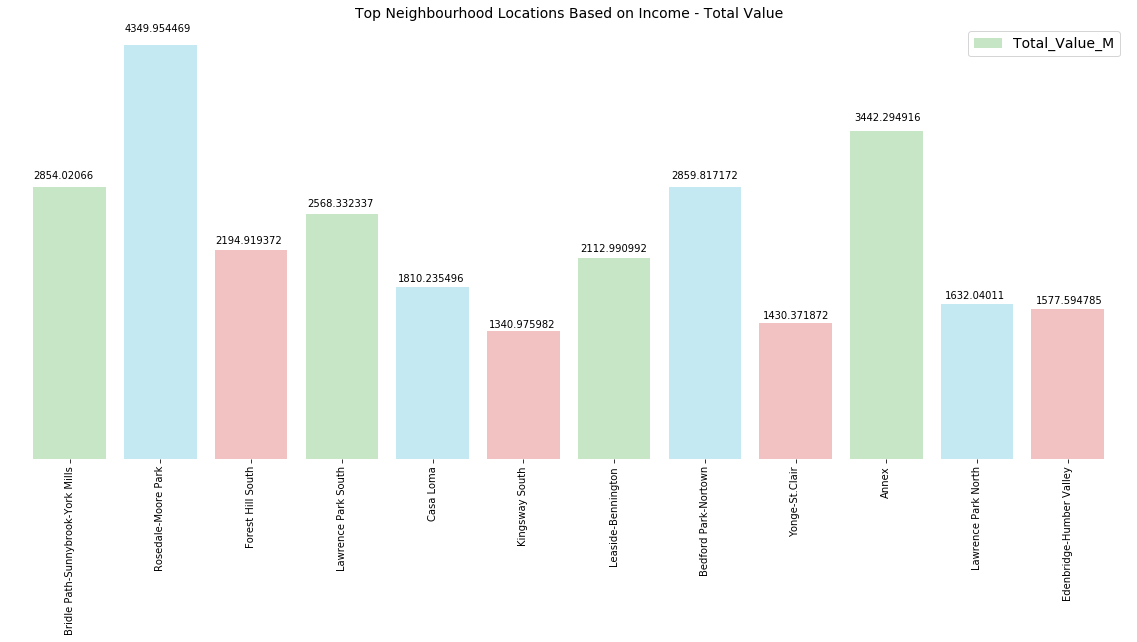

In [104]:
IncValue = dfTorontoIncVal

IncValue = IncValue.plot(kind='bar', alpha=0.35, figsize=(20, 8),width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

IncValue.set_title('Top Neighbourhood Locations Based on Income - Total Value',fontsize=14)
IncValue.set_ylabel('Number')
IncValue.set_xlabel('Neighbourhoods')
IncValue.legend(fontsize = 14)
IncValue.set_frame_on(False)
IncValue.set_xlabel(False).set_visible(False)
IncValue.axes.get_yaxis().set_visible(False)
IncValue.set_xticklabels(('Bridle Path-Sunnybrook-York Mills','Rosedale-Moore Park','Forest Hill South','Lawrence Park South','Casa Loma','Kingsway South','Leaside-Bennington','Bedford Park-Nortown','Yonge-St.Clair','Annex','Lawrence Park North','Edenbridge-Humber Valley'))

for p in IncValue.patches:
    IncValue.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

### Population  based sorting

In [111]:
#Top 12 neighbourhoods by Population
dfTorontoPop=dfToronto.sort_values(['Population_2016'], ascending=[False])
dfTorontoPop.head(12)

,Population_2016,Income_2016
Waterfront Communities-The Island,65913,70600
Woburn,53485,30878
Willowdale East,50434,45326
Rouge,46496,39556
L'Amoreaux,43993,31826
Islington-City Centre West,43965,52787
Malvern,43794,29573
Dovercourt-Wallace Emerson-Junction,36625,39740
Downsview-Roding-CFB,35052,34168
Parkwoods-Donalda,34805,42516


In [113]:
dfTorontoPop = dfTorontoPop.loc[['Waterfront Communities-The Island','Woburn','Willowdale East','Rouge','L\'Amoreaux','Islington-City Centre West','Malvern','Dovercourt-Wallace Emerson-Junction','Downsview-Roding-CFB','Parkwoods-Donalda','Mimico (includes Humber Bay Shores)','West Humber-Clairville']]
dfTorontoPop

,Population_2016,Income_2016
Waterfront Communities-The Island,65913,70600
Woburn,53485,30878
Willowdale East,50434,45326
Rouge,46496,39556
L'Amoreaux,43993,31826
Islington-City Centre West,43965,52787
Malvern,43794,29573
Dovercourt-Wallace Emerson-Junction,36625,39740
Downsview-Roding-CFB,35052,34168
Parkwoods-Donalda,34805,42516


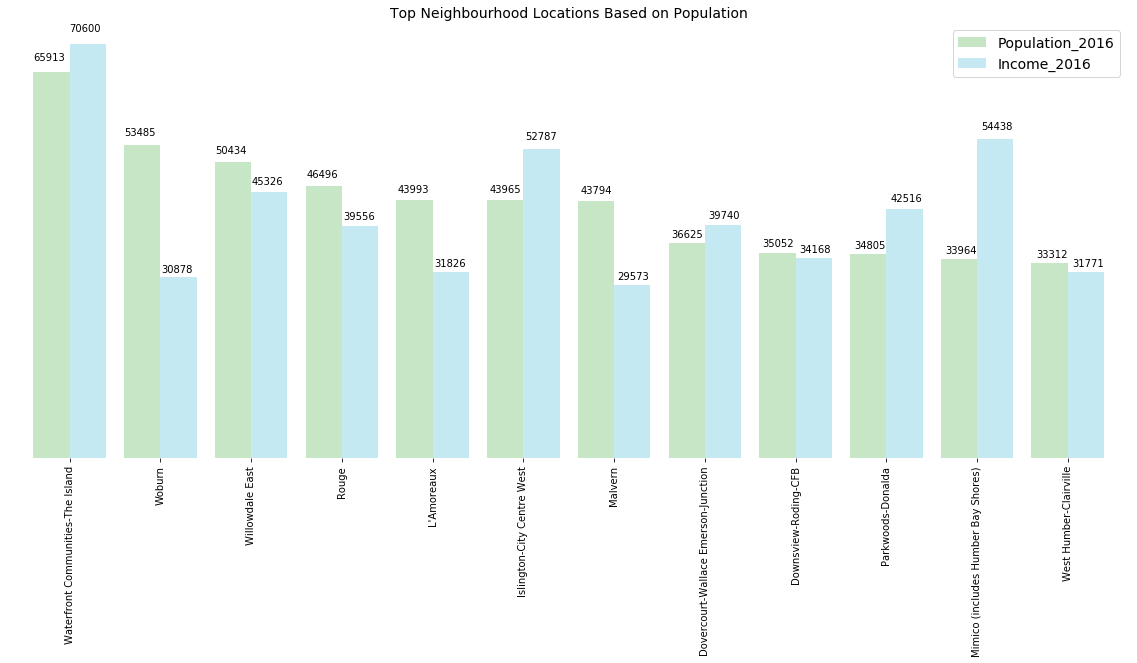

In [114]:
PopPlot = dfTorontoPop.plot(kind='bar', alpha=0.35, figsize=(20, 8),width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

PopPlot.set_title('Top Neighbourhood Locations Based on Population',fontsize=14)
PopPlot.set_ylabel('Number')
PopPlot.set_xlabel('Neighbourhoods')
PopPlot.legend(fontsize = 14)
PopPlot.set_frame_on(False)
PopPlot.set_xlabel(False).set_visible(False)
PopPlot.axes.get_yaxis().set_visible(False)
PopPlot.set_xticklabels(('Waterfront Communities-The Island','Woburn','Willowdale East','Rouge','L\'Amoreaux','Islington-City Centre West','Malvern','Dovercourt-Wallace Emerson-Junction','Downsview-Roding-CFB','Parkwoods-Donalda','Mimico (includes Humber Bay Shores)','West Humber-Clairville'))

for p in PopPlot.patches:
    PopPlot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

In [115]:
dfTorontoPopVal = dfTorontoPop
dfTorontoPopVal['Total_Value_M'] = dfTorontoPopVal.Population_2016 * dfTorontoPopVal.Income_2016 / 1000000
dfTorontoPopVal

dfTorontoPopVal = dfTorontoPopVal.Total_Value_M
dfTorontoPopVal

Waterfront Communities-The Island      4653.457800
Woburn                                 1651.509830
Willowdale East                        2285.971484
Rouge                                  1839.195776
L'Amoreaux                             1400.121218
Islington-City Centre West             2320.780455
Malvern                                1295.119962
Dovercourt-Wallace Emerson-Junction    1455.477500
Downsview-Roding-CFB                   1197.656736
Parkwoods-Donalda                      1479.769380
Mimico (includes Humber Bay Shores)    1848.932232
West Humber-Clairville                 1058.355552
Name: Total_Value_M, dtype: float64

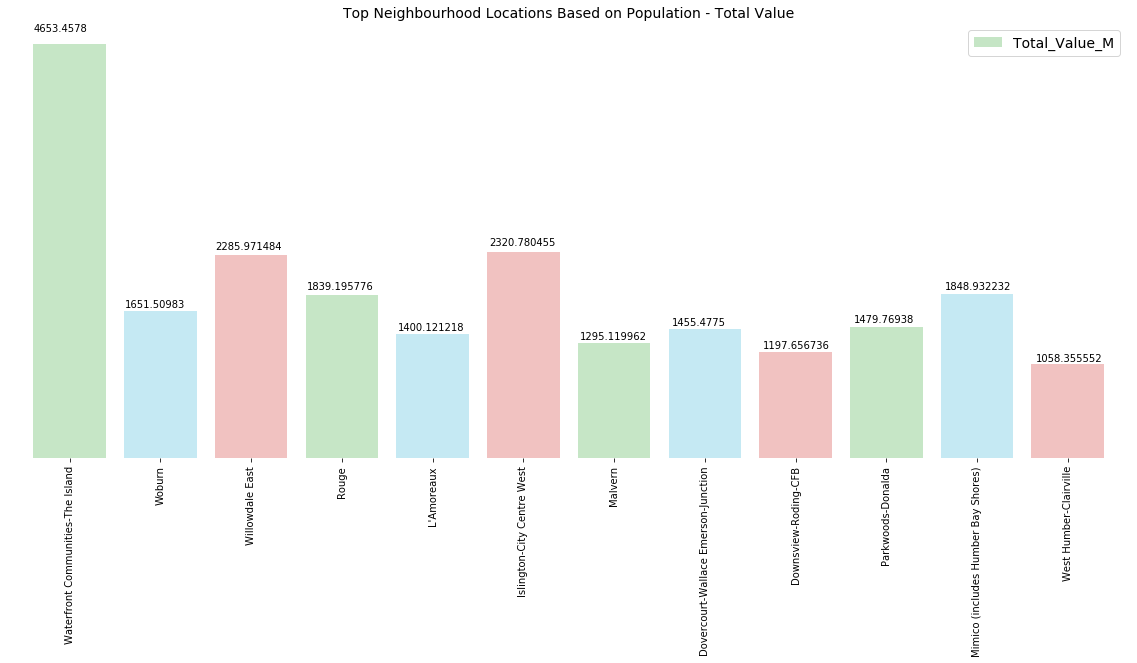

In [116]:
PopVal = dfTorontoPopVal.plot(kind='bar', alpha=0.35, figsize=(20, 8),width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

PopVal.set_title('Top Neighbourhood Locations Based on Population - Total Value',fontsize=14)
PopVal.set_ylabel('Number')
PopVal.set_xlabel('Neighbourhoods')
PopVal.legend(fontsize = 14)
PopVal.set_frame_on(False)
PopVal.set_xlabel(False).set_visible(False)
PopVal.axes.get_yaxis().set_visible(False)
PopVal.set_xticklabels(('Waterfront Communities-The Island','Woburn','Willowdale East','Rouge','L\'Amoreaux','Islington-City Centre West','Malvern','Dovercourt-Wallace Emerson-Junction','Downsview-Roding-CFB','Parkwoods-Donalda','Mimico (includes Humber Bay Shores)','West Humber-Clairville'))

for p in PopVal.patches:
    PopVal.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

### Full set, sort by total value

In [141]:
dfTorontoVal = dfToronto
dfTorontoVal['Total_Value_M'] = dfTorontoVal.Population_2016 * dfTorontoVal.Income_2016 / 1000000
dfTorontoVal

,Population_2016,Income_2016,Total_Value_M
Agincourt North,29113,30414,885.442782
Agincourt South-Malvern West,23757,31825,756.066525
Alderwood,12054,47709,575.084286
Annex,30526,112766,3442.294916
Banbury-Don Mills,27695,67757,1876.530115
Bathurst Manor,15873,45936,729.142128
Bay Street Corridor,25797,56526,1458.201222
Bayview Village,21396,52035,1113.340860
Bayview Woods-Steeles,13154,47246,621.473884
Bedford Park-Nortown,23236,123077,2859.817172


In [142]:
#Top 12 neighbourhoods by Total Value
dfTorontoVal=dfTorontoVal.sort_values(['Total_Value_M'], ascending=[False])
dfTorontoVal.head(12)

,Population_2016,Income_2016,Total_Value_M
Waterfront Communities-The Island,65913,70600,4653.457800
Rosedale-Moore Park,20923,207903,4349.954469
Annex,30526,112766,3442.294916
Bedford Park-Nortown,23236,123077,2859.817172
Bridle Path-Sunnybrook-York Mills,9266,308010,2854.020660
Lawrence Park South,15179,169203,2568.332337
Islington-City Centre West,43965,52787,2320.780455
Willowdale East,50434,45326,2285.971484
Niagara,31180,70623,2202.025140
Forest Hill South,10732,204521,2194.919372


In [143]:
dfTorontoVal = dfTorontoVal.loc[['Waterfront Communities-The Island','Rosedale-Moore Park','Annex','Bedford Park-Nortown','Bridle Path-Sunnybrook-York Mills','Lawrence Park South','Islington-City Centre West','Willowdale East','Niagara','Forest Hill South','Leaside-Bennington','The Beaches']]
dfTorontoVal

,Population_2016,Income_2016,Total_Value_M
Waterfront Communities-The Island,65913,70600,4653.457800
Rosedale-Moore Park,20923,207903,4349.954469
Annex,30526,112766,3442.294916
Bedford Park-Nortown,23236,123077,2859.817172
Bridle Path-Sunnybrook-York Mills,9266,308010,2854.020660
Lawrence Park South,15179,169203,2568.332337
Islington-City Centre West,43965,52787,2320.780455
Willowdale East,50434,45326,2285.971484
Niagara,31180,70623,2202.025140
Forest Hill South,10732,204521,2194.919372


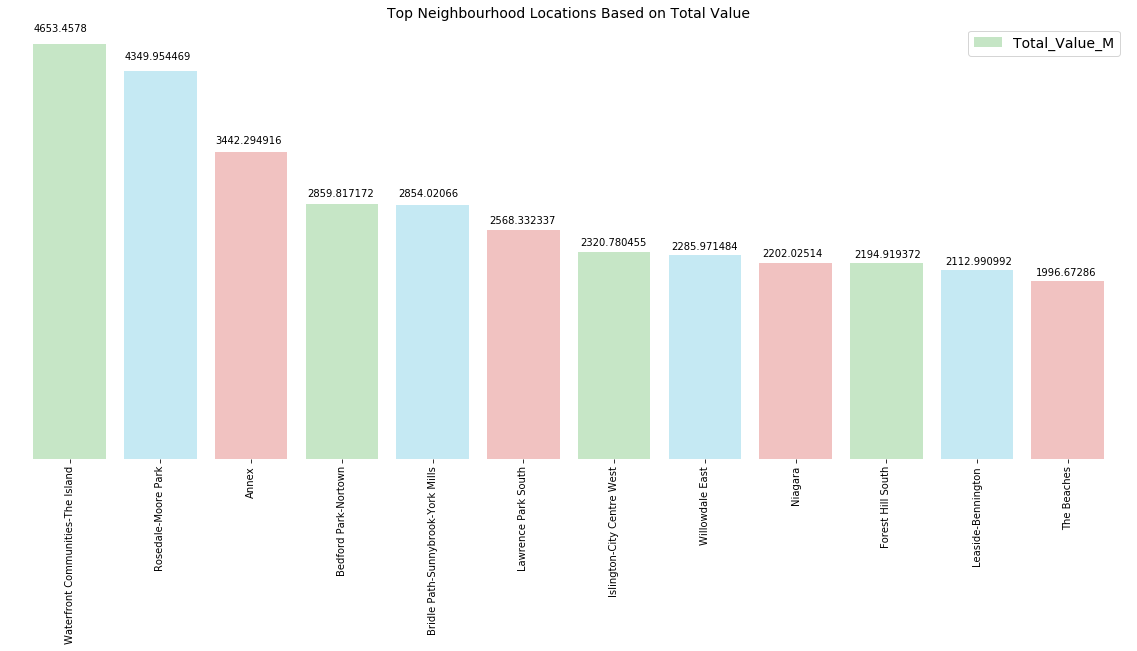

In [144]:
dfTorontoVal = dfTorontoVal.Total_Value_M
dfTorontoVal

TVal = dfTorontoVal.plot(kind='bar', alpha=0.35, figsize=(20, 8),width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'])

TVal.set_title('Top Neighbourhood Locations Based on Total Value',fontsize=14)
TVal.set_ylabel('Number')
TVal.set_xlabel('Neighbourhoods')
TVal.legend(fontsize = 14)
TVal.set_frame_on(False)
TVal.set_xlabel(False).set_visible(False)
TVal.axes.get_yaxis().set_visible(False)
TVal.set_xticklabels(('Waterfront Communities-The Island','Rosedale-Moore Park','Annex','Bedford Park-Nortown','Bridle Path-Sunnybrook-York Mills','Lawrence Park South','Islington-City Centre West','Willowdale East','Niagara','Forest Hill South','Leaside-Bennington','The Beaches'))

for p in TVal.patches:
    TVal.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

### API Data

In [134]:
#import some more stuff
import json, requests
url = 'https://api.foursquare.com/v2/venues/explore'

In [137]:
params = dict(
client_id= 'XLMPAFCNNKIUFRXZTIDI4ZONVTMZXCY22R5EDHUF3UETB0C3',
client_secret='5E30SCJCTAZQD0ICF5DREZON5XXWDMB0XOETWQWYRYJ4GVDR',
v='20180323',
ll='43.6532,-79.3832',
query='restaurant',
limit=100
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)

AttributeError: 'dict' object has no attribute 'head'